In [1]:
# Goal: Estimate per spectral bin uncertainty and compare with the scale-factor method currently used
import sys, os
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc
import astropy.table as table
from astropy.cosmology import Planck15 as cosmology

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.const as const
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [7]:
sds = specds.load_dataset('SN2019odp')
sds.names[0:10]

['ZTF19abqwtfu_20190821_P60_v1',
 'ZTF19abqwtfu_20190823_NTT_v1',
 'ZTF19abqwtfu_20190823_P60_v1',
 'ZTF19abqwtfu_20190824_P60_v1',
 'ZTF19abqwtfu_20190827_P200_v1',
 'ZTF19abqwtfu_20190827_P60_v1',
 'ZTF19abqwtfu_20190830_NOT_v1',
 'ZTF19abqwtfu_20190831_P60_v1',
 'ZTF19abqwtfu_20190910_P60_v1',
 'ZTF19abqwtfu_20190917_P60_v1']

In [11]:
spec = sds['ZTF19abqwtfu_20190823_NTT_v1']
#spec = sds['ZTF19abqwtfu_20190821_P60_v1']

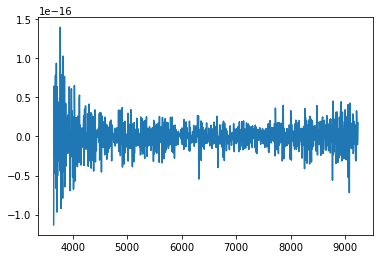

In [12]:
plt.plot(spec['obswave'][1:], np.diff(spec['flux']))

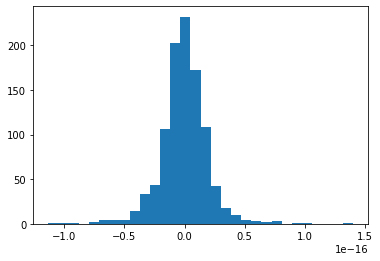

In [15]:
plt.hist(np.diff(spec['flux']), bins=30);

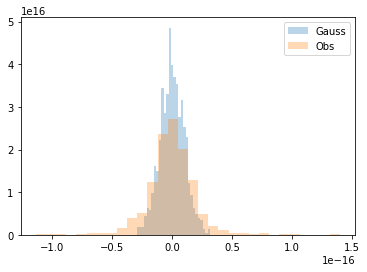

In [24]:
samples = np.random.normal(0, 1e-17, size=len(spec))
plt.hist(samples, bins=30, histtype='stepfilled', alpha=0.3, density=True, label='Gauss');
plt.hist(np.diff(spec['flux']), bins=30, histtype='stepfilled', alpha=0.3, density=True, label='Obs');
plt.legend();

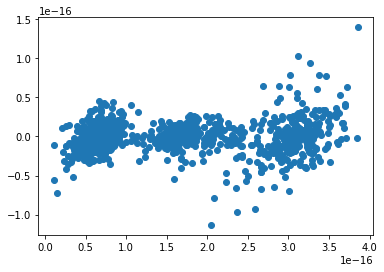

In [28]:
spec = sds['ZTF19abqwtfu_20190823_NTT_v1']
plt.scatter(spec['flux'][1:], np.diff(spec['flux']));

In [27]:
# do it for each spectrum
data = []
for spec in sds.specs:
    name = spec.meta['name']
    x = {'name': name}
    idx = np.logical_and(spec['obswave'] > 4000, spec['obswave'] < 9000)
    x['std'] = np.nanstd(np.diff(spec['flux'][idx]))
    data.append(x)
t = table.Table(rows=data)
t

<Table length=28>
             name                       std          
            str30                     float64        
------------------------------ ----------------------
  ZTF19abqwtfu_20190821_P60_v1 3.6557316299748625e-17
  ZTF19abqwtfu_20190823_NTT_v1 1.5822890884302272e-17
  ZTF19abqwtfu_20190823_P60_v1  1.785504908950559e-17
  ZTF19abqwtfu_20190824_P60_v1  3.279875811905892e-17
 ZTF19abqwtfu_20190827_P200_v1 2.2774007767931088e-17
  ZTF19abqwtfu_20190827_P60_v1  1.086993537561795e-16
  ZTF19abqwtfu_20190830_NOT_v1 2.7700536404845154e-17
  ZTF19abqwtfu_20190831_P60_v1  4.013252901256325e-17
  ZTF19abqwtfu_20190910_P60_v1  5.034836764279858e-17
  ZTF19abqwtfu_20190917_P60_v1  5.877175498663882e-17
                           ...                    ...
  ZTF19abqwtfu_20191103_P60_v1  4.700478518498145e-17
  ZTF19abqwtfu_20191110_P60_v1  5.440024420880177e-17
  ZTF19abqwtfu_20191122_NOT_v2  9.110121504727972e-18
  ZTF19abqwtfu_20191123_P60_v1  4.733841516704233e-17
  ZTF19abqwtfu_20191218_P60_v1 1.3925478905960734e-16
  ZTF19abqwtfu_20191221_P60_v1 1.1459567015609037e-16
  ZTF19abqwtfu_20200103_P60_v1  2.447695450368066e-17
  ZTF19abqwtfu_20200113_NOT_v1  9.395640563324519e-18
ZTF19abqwtfu_20200124_Keck1_v1  7.002413899090286e-18
ZTF19abqwtfu_20200821_Keck1_v1  3.031557125203086e-18